In [1]:
import os
import nrrd

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from ioutil import sample_paths

sns.set()
%matplotlib inline

# GTV reduction

In [2]:
path_orig_masks = './../../data_source/images/masks_nrrd'
path_red_masks = './../../data_source/images/masks_removed_broken_slices_ct_size'

path_to_files = sample_paths(path_orig_masks, path_red_masks, target_format='nrrd')

red_volume = []
for path_to_file in path_to_files:
    
    orig_mask, _ = nrrd.read(path_to_file['Image'])
    red_mask, _ = nrrd.read(path_to_file['Mask'])
    
    red_volume.append(np.sum(red_mask) / np.sum(orig_mask))

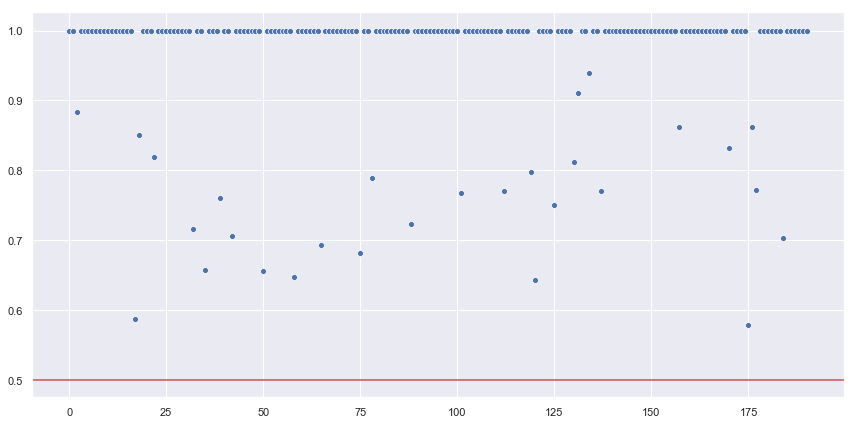

In [3]:
x_coords = np.arange(len(red_volume))

plt.figure(figsize=(12, 6))
sns.scatterplot(
    x_coords, red_volume
)
plt.axhline(y=0.5, c='r')
plt.tight_layout()

# Statistical Difference Test

**Observations**
* A lot of features have significantly changed mean after removal of slices.
* The idea of removing damaged slices if to obtain a representative first order and texture features compared to features calculated from slices containing various artifacts.

**Theory**
* https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

In [4]:
from scipy.stats import ttest_rel

In [5]:
orig_firstorder = pd.read_csv(
    './../../data_source/to_analysis/original_images/firstorder_original_images.csv',
    index_col=0
)
rs_firstorder = pd.read_csv(
    './../../data_source/to_analysis/removed_broken_slices/firstorder_removed_broken_slices.csv',
    index_col=0
)

In [6]:
orig_texture = pd.read_csv(
    './../../data_source/to_analysis/original_images/texture_original_images.csv',
    index_col=0
)
rs_texture = pd.read_csv(
    './../../data_source/to_analysis/removed_broken_slices/texture_removed_broken_slices.csv',
    index_col=0
)

In [7]:
firstorder_pvalues = []
for col in orig_firstorder:
    _, p_value = ttest_rel(
        rs_firstorder.loc[:, col].values,
        orig_firstorder.loc[rs_firstorder.index, col].values

    )
    firstorder_pvalues.append(p_value)    

In [8]:
texture_pvalues = []
for col in orig_texture:
    try:
        _, p_value = ttest_rel(
            rs_texture.loc[:, col].values,
            orig_texture.loc[rs_texture.index, col].values

        )
        texture_pvalues.append(p_value)
    except:
        pass

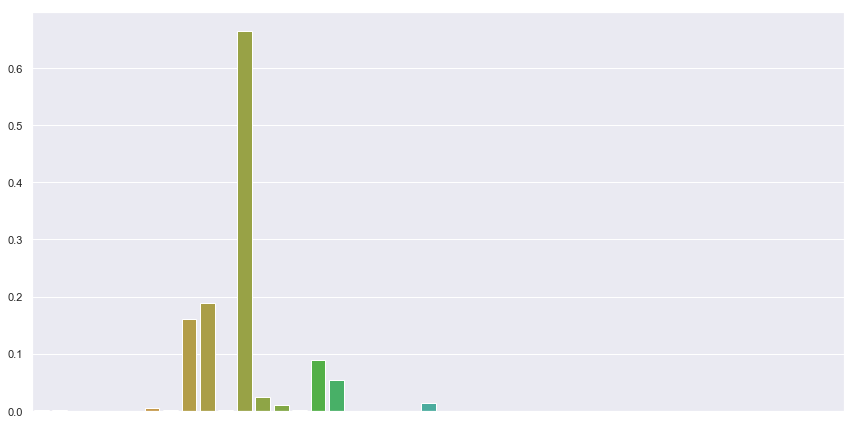

In [14]:
x_coords = np.arange(len(firstorder_pvalues))

plt.figure(figsize=(12, 6))
sns.barplot(
    x=x_coords,
    y=firstorder_pvalues
)
plt.xticks([], [])
plt.tight_layout()

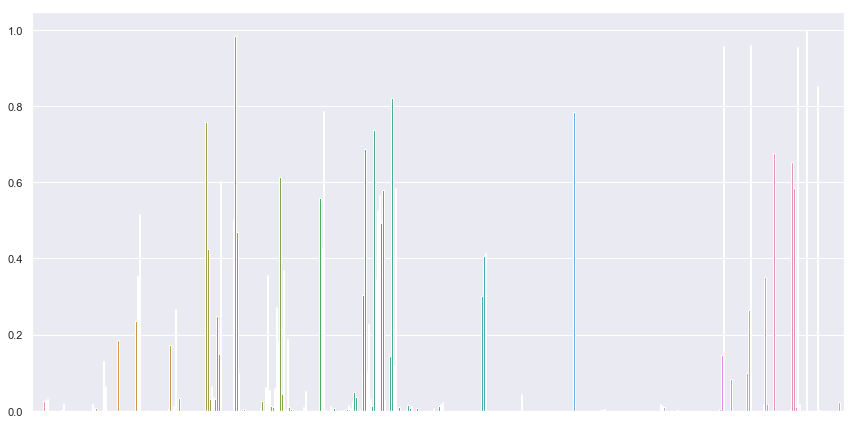

In [15]:
x_coords = np.arange(len(texture_pvalues))

plt.figure(figsize=(12, 6))
sns.barplot(
    x=x_coords,
    y=texture_pvalues
)
plt.xticks([], [])
plt.tight_layout()